In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

(X_train, y_train), (X_test, y_test) = mnist.load_data()
(X_train, y_train) = (X_train[:10000], y_train[:10000])
(X_test, y_test) = (X_test[:100], y_test[:100])

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (10000, 28, 28)
Training labels shape:  (10000,)
Test data shape:  (100, 28, 28)
Test labels shape:  (100,)


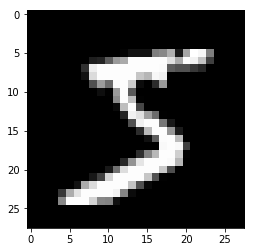

In [3]:
plt.imshow(X_train[0])
plt.show()

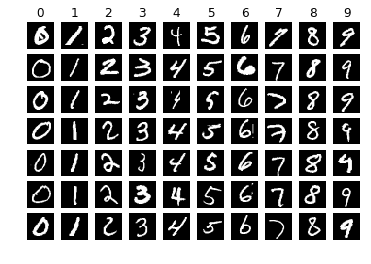

In [4]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = [0,1,2,3,4,5,6,7,8,9]
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx])
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Create a kNN classifier instance. 
# Remember that training a kNN classifier is a noop: 
# the Classifier simply remembers the data and does no further processing 
nsamples, nx, ny = X_train.shape
d2_X_train = X_train.reshape((nsamples,nx*ny))
nsamples_test, nx_test, ny_test = X_test.shape
d2_X_test = X_test.reshape((nsamples_test,nx_test*ny_test))
model = KNeighborsClassifier(n_neighbors=25)
model.fit(d2_X_train, y_train)
predictions = model.predict(d2_X_test)
print(predictions)
print(y_test)
 
# show a final classification report demonstrating the accuracy of the classifier
# for each of the number
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, predictions))

# evaluate the model and update the accuracies list
score = model.score(d2_X_test, y_test)
print("accuracy=%.2f%%" % (score * 100))


[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 1 1 1 7 4 1 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 7 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]
EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.88      1.00      0.93        14
           2       1.00      0.62      0.77         8
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00        10
           7       0.94      1.00      0.97        15
           8       1.00      1.00      1.00         2
           9       1.00 